# **Tarea S801 - Visualitzacions en Python**

Aquesta pràctica permetrà explorar com es poden utilitzar eines de visualització avançades en Python per a interpretar i presentar dades de manera efectiva, proporcionant una oportunitat valuosa per a millorar les habilitats analítiques i tècniques.

### **Nivel 1**

Realitza la connexió en Python amb el MySQL Workbench per a carregar tota la informació que tens en les taules.

Realitzaràs una visualització per a cada exercici. Comenta el que et crida l'atenció de graficar aquesta variable, justifica l'elecció del gràfic i interpreta els resultats en funció de les teves dades.

In [229]:
"""1º Importo las librerías que creo que puedo necesitar en esta tarea."""

import mysql.connector
from mysql.connector import Error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import squarify
import datetime as dt

In [230]:
try:
    connection = mysql.connector.connect(host='localhost',
                                         database= 'new_transactions',
                                         user= 'root',
                                         password='Gregorio@00')
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)

except Error as e:
    print("Error while connecting to MySQL", e)
finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed")

"""Conexión a SQL sin errores"""

Connected to MySQL Server version  8.0.39
You're connected to database:  ('new_transactions',)
MySQL connection is closed


'Conexión a SQL sin errores'

In [231]:
"""Para guardar todos las tablas en un dataframe, puedo crear un diccionario.
dataframe = {}
Con un bucle for puedo recorrer las tablas con una query e ir guardándolas:
query = "SELECT * FROM {tabla}
Ver cómo se guardan las tablas, si están numeradas las puedo recorrer sin problemas."""

import mysql.connector
import pandas as pd

conexion = mysql.connector.connect(host='localhost',
                               database='new_transactions',
                               user='root',
                               password='Gregorio@00')

# Guardar tablas en un diccionario
cursor = conexion.cursor()
cursor.execute("SHOW TABLES;")
tables= cursor.fetchall()
print(tables)               # Para ver cómo están guardadas las tablas --> están guardadas como tuplas, elem[0] de cada tupla es una tabla

dict_transactions = {}      # defino el diccionario donde guardaré las tablas

for elem in tables:         # recorro cada tabla y la voy añadiendo al diccionario --> diccionario anidado
    query = "SELECT * FROM " + elem[0]
    dict_transactions[elem[0]] = pd.read_sql(query, conexion)

[('card_status',), ('companies',), ('credit_cards',), ('data_users',), ('products',), ('trans_prod',), ('transactions',)]


C:\Users\maria\AppData\Local\Temp\ipykernel_19308\580628673.py:25: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [232]:
for key, df in dict_transactions.items():
	print(f"Info for {key}:")
	print(df.info())
	print("\n")

Info for card_status:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   credit_card_id  275 non-null    object
 1   active          275 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.4+ KB
None


Info for companies:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_id    100 non-null    object
 1   company_name  100 non-null    object
 2   phone         100 non-null    object
 3   email         100 non-null    object
 4   country       100 non-null    object
 5   website       100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB
None


Info for credit_cards:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 9 columns):
 #   Col

In [233]:
# Compruebo las claves de mi diccionario principal
dict_transactions.keys()

dict_keys(['card_status', 'companies', 'credit_cards', 'data_users', 'products', 'trans_prod', 'transactions'])

In [234]:
type(dict_transactions['transactions']['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [235]:
# Creo columna year
dict_transactions['transactions']['year'] = dict_transactions['transactions']['timestamp'].apply(lambda x: x.year)

# Columna month
dict_transactions['transactions']['month'] = dict_transactions['transactions']['timestamp'].apply(lambda x: x.month)

# Columna day
dict_transactions['transactions']['day'] = dict_transactions['transactions']['timestamp'].apply(lambda x: x.day)

# Columna year_month
dict_transactions['transactions']['year_month'] = dict_transactions['transactions']['timestamp'].dt.to_period('M')

In [236]:
# Creo una columna product_quantity en transactions
dict_transactions['transactions']['product_list'] = dict_transactions['transactions']['product_list'].apply(lambda x: x.split(','))
dict_transactions['transactions']['product_quantity'] = dict_transactions['transactions']['product_list'].apply(len)

dict_transactions['transactions']

,transaction_id,credit_card_id,company_id,timestamp,amount,declined,product_list,user_id,lat,longitude,year,month,day,year_month,product_quantity
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"[71, 1, 19]",92,81.91850,-12.5276,2021,8,28,2021-08,3
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"[47, 97, 43]",170,-43.96950,-117.5250,2021,7,26,2021-07,3
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"[47, 67, 31, 5]",275,-81.22270,-129.0500,2022,1,6,2022-01,4
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"[89, 83, 79]",265,-34.35930,-100.5560,2022,1,26,2022-01,3
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"[43, 31]",92,33.73810,158.2980,2021,10,26,2021-10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,FD2E8957-414B-BEEC-E9AD-59AA7A8A6290,CcU-3232,b-2390,2022-03-13 00:27:34,78.29,0,"[83, 7, 17, 89]",272,-24.31950,-11.4135,2022,3,13,2022-03,4
583,FD89D51B-AE8D-77DC-E450-B8083FBD3187,CcU-3960,b-2494,2022-03-16 02:35:05,200.72,0,"[3, 2, 73, 1]",250,8.01217,-64.6715,2022,3,16,2022-03,4
584,FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65,CcU-4331,b-2302,2021-06-13 11:41:17,42.32,0,[37],223,-77.86050,-172.3460,2021,6,13,2021-06,1
585,FE809ED4-2DB6-55AC-C915-929516E4646B,CcU-4849,b-2302,2021-11-09 21:35:40,219.83,0,"[23, 43]",185,-46.07510,-142.2420,2021,11,9,2021-11,2


#### **Ejercicio 1**

Una variable numèrica.

*Total de transacciones aceptadas*

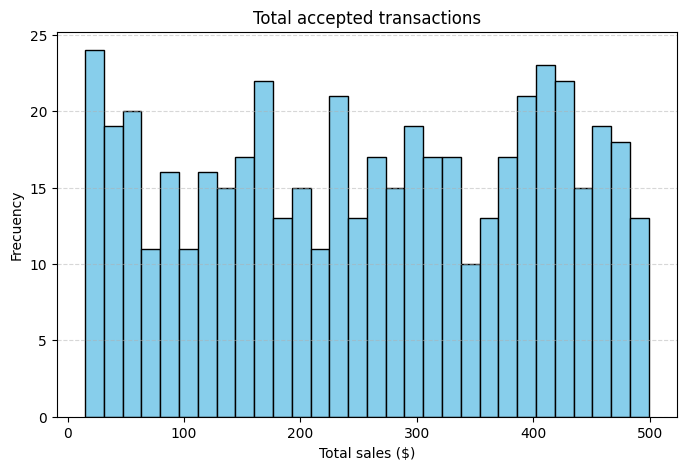

In [258]:
accepted_transactions = dict_transactions['transactions'].query("declined == 0").copy()

plt.figure(figsize=(8, 5))
plt.hist(accepted_transactions["amount"], bins=30, color="skyblue", edgecolor="black")
plt.title("Total accepted transactions")
plt.xlabel("Total sales ($)")
plt.ylabel("Frecuency")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()



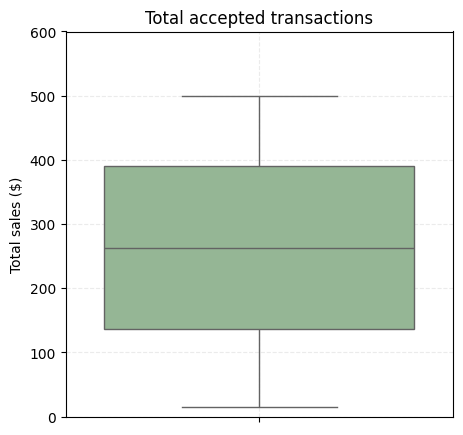

In [ ]:
plt.figure(figsize=(5, 5))
sns.boxplot(accepted_transactions["amount"], color="darkseagreen")
plt.title("Total accepted transactions")
plt.ylabel("Total sales ($)")
plt.ylim(0, 600)
plt.grid(True, linestyle='--', alpha=0.25)
plt.show()

# SON DOS VARIABLES

---

#### **Ejercicio 2**

Dues variables numèriques.

*Representación del precio de los productos y el valor de las transacciones aceptadas.*

In [239]:
"""
Transacciones vs productos vendidos en cada transacción.
Tengo que unir las 3 tablas: transactions, trans_prod y products --> MERGE
"""

merged_data = dict_transactions['transactions'].merge(dict_transactions['trans_prod'], on="transaction_id", how="inner").merge(dict_transactions['products'], on="product_id", how="inner")

fig = go.Figure()

X= merged_data['amount']
Y= merged_data['price']

# Add the scatter trace
fig.add_trace(go.Scatter( 
    x= X,
    y= Y,
    mode='markers', 
    marker=dict(
        size=10, # Size
        color='darkseagreen', # Color
        opacity=0.8, # Point transparency 
        line=dict(width=1, color='black') # Properties of the edges
    ),
     text=[f"Total sale = $ {sale:.2f}, Product price = $ {price:.2f}" 
          for sale, price in zip(merged_data['amount'], merged_data['price'])]
))

fig.update_layout(
    title='Product price ($) vs. Total sales amount ($)', 
    xaxis_title='Sales amount by transaction ($)',
    yaxis_title='Product price ($)',
    width=800,
    height=600
)

fig.show()

*No hay relación entre el precio de los productos y el total de las transacciones en las que aparecen.
Resultan casi líneas rectas horizontales porque cada producto de un precio determinado aparece en transcciones de diferentes valores.*

---

#### **Ejercicio 3**

Una variable categòrica.

*Representación de las ventas realizadas por país (treemap de matplotlib).*

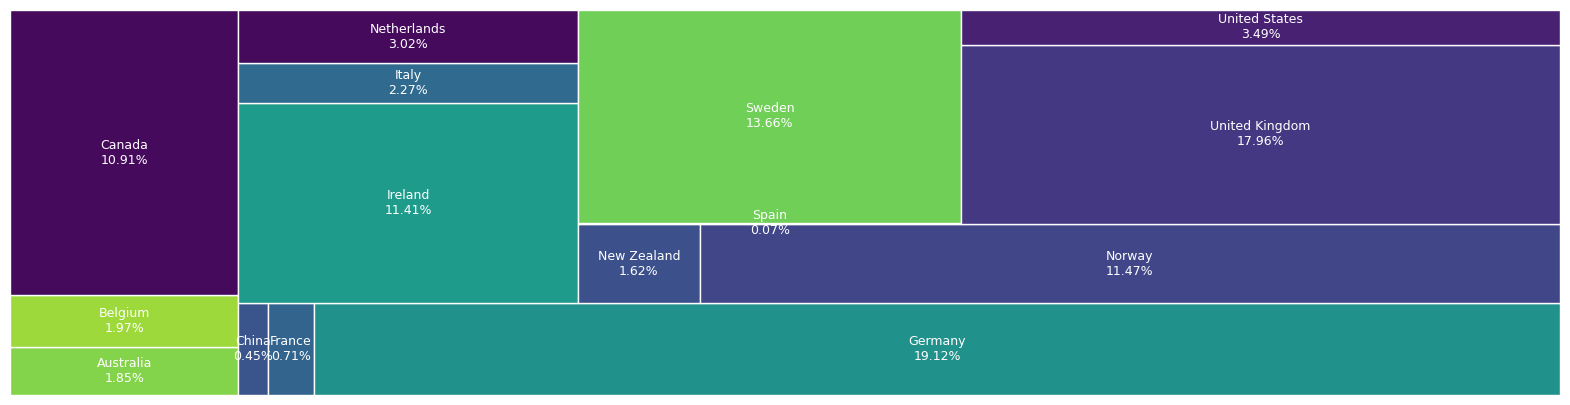

In [240]:
# Unir transactions con companies para obtener el país del vendedor
transactions_with_companies = dict_transactions['transactions'].merge(dict_transactions['companies'][['company_id', 'country']], on='company_id', how='left')

# Agrupo por país y sumo las ventas
country_sum_accepted_sales = transactions_with_companies.groupby('country')['amount'].sum().reset_index()
total_accepted_amount = country_sum_accepted_sales['amount'].sum()
percentage = [amount / total_accepted_amount * 100 for amount in country_sum_accepted_sales['amount']]     # list comprehension

S = country_sum_accepted_sales['amount']
L = country_sum_accepted_sales['country']

# create a figure
fig, ax = plt.subplots(figsize=(20,5))

# add treemap
squarify.plot(
   sizes=S,
   label= [f"{country}\n{pct:.2f}%" for country, pct in zip(L, percentage)],     # tengo que unir el nombre del país con su porcentaje
   ax=ax,
   ec= 'white',
   text_kwargs={'color': 'white', 'fontsize': 9}
)
plt.axis('off')

# display plot
plt.show()

*Representación de las ventas realizadas por país (treemap de plotly express).*

In [241]:
# Agrupo por país y sumo las ventas
transactions_with_companies = dict_transactions['transactions'].merge(dict_transactions['companies'][['company_id', 'country']], on='company_id', how='left')

country_sum_accepted_sales = transactions_with_companies.groupby('country')['amount'].sum().reset_index()
total_accepted_amount = country_sum_accepted_sales['amount'].sum()
country_sum_accepted_sales['percentage'] = country_sum_accepted_sales['amount'] / total_accepted_amount * 100

# Crear el treemap con plotly
fig2 = px.treemap(country_sum_accepted_sales, 
                 path=['country'], 
                 values='amount', 
                 title='Total sales by country',
                 labels={'amount': 'Total sales ($)'},
                 hover_data={'percentage': ':.2f%'})            # No salen con soo 2 decimales!!

# Mostrar el gráfico
fig2.show()

---

#### **Ejercicio 4**

Una variable categòrica i una numèrica.

*Representación de compras aceptadas por país.*

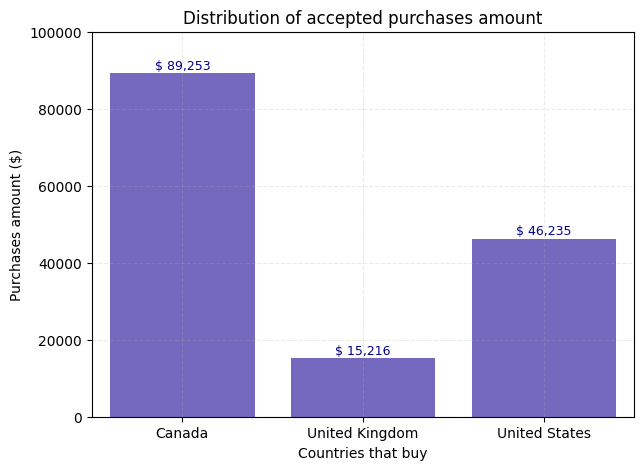

In [242]:
plt.figure(figsize=(7, 5))

# Unir transactions con data_users para obtener el país del comprador
transactions_with_users = dict_transactions['transactions'].merge(dict_transactions['data_users'][['user_id', 'country']], on='user_id', how='left')

# Agrupo por país y calculo la suma de las transacciones aceptadas
country_sum_accepted_transactions = transactions_with_users.groupby('country')['amount'].sum().reset_index()

X = country_sum_accepted_transactions['country']
Y = country_sum_accepted_transactions['amount']

# Compras por país
sns.barplot(x= X, y= Y, color="slateblue")
plt.title("Distribution of accepted purchases amount")
plt.xlabel("Countries that buy")
plt.ylabel("Purchases amount ($)")
plt.ylim(0, 100000)
plt.grid(True, linestyle='--', alpha=0.25)

# Etiquetas de valores
for i, v in enumerate(Y):
    plt.text(i, v + 1000, f"$ {v:,.0f}", ha='center', fontsize=9, color='darkblue')

plt.show()

*Representación de ventas aceptadas por país (gráfico de columnas).*

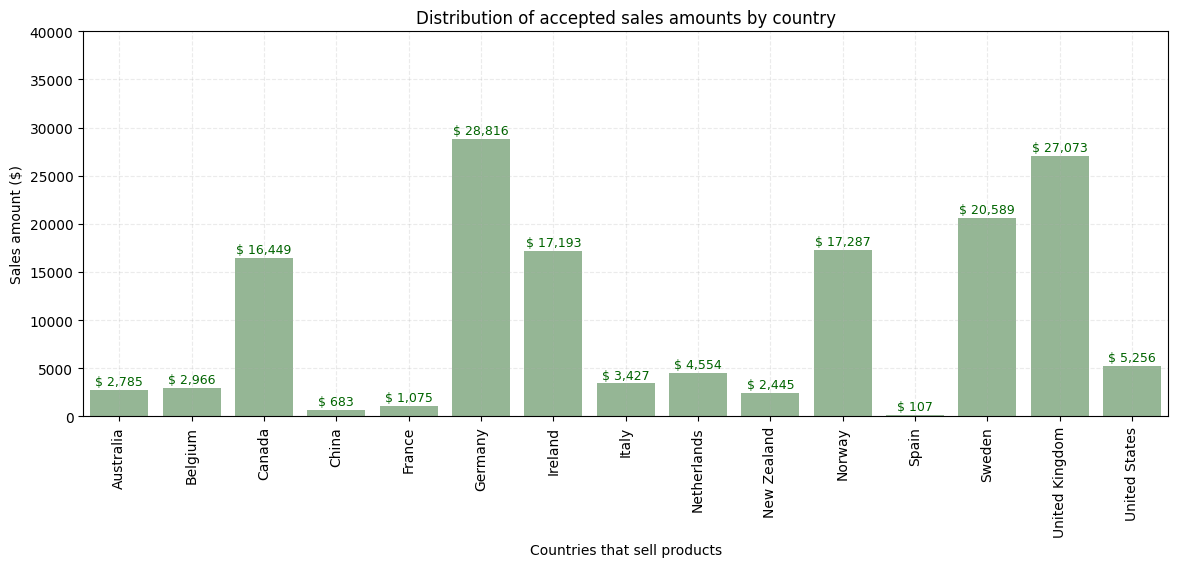

In [243]:
plt.figure(figsize=(14, 5))

# Unir transactions con companies para obtener el país del vendedor
transactions_with_companies = dict_transactions['transactions'].merge(dict_transactions['companies'][['company_id', 'country']], on='company_id', how='left')

# Agrupo por país y calculo la media de las transacciones aceptadas
country_sum_accepted_sales = transactions_with_companies.groupby('country')['amount'].sum().reset_index()

X = country_sum_accepted_sales['country']
Y = country_sum_accepted_sales['amount']

# Ventas por país
sns.barplot(x= X, y= Y, color="darkseagreen")
plt.title("Distribution of accepted sales amounts by country")
plt.xlabel("Countries that sell products")
plt.ylabel("Sales amount ($)")
plt.xticks(rotation=90)
plt.ylim(0, 40000)
plt.grid(True, linestyle='--', alpha=0.25)

# Etiquetas de valores
for i, v in enumerate(Y):
    plt.text(i, v + 500, f"$ {v:,.0f}", ha='center', fontsize=9, color='darkgreen')

plt.show()

*Representación de ventas aceptadas por país (boxplot).*

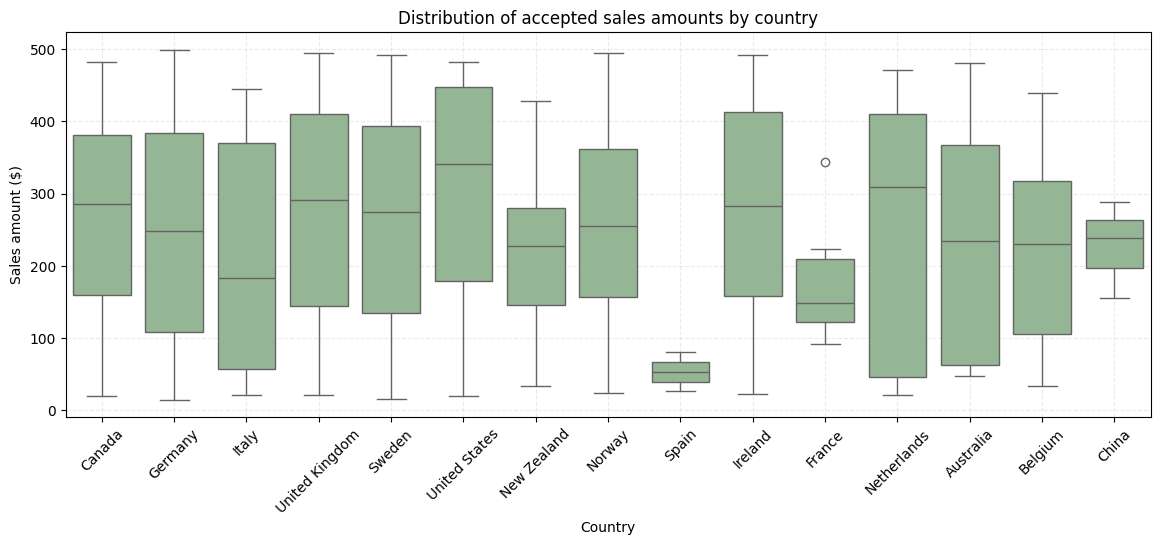

In [244]:
# Unir transactions con companies para obtener el país del vendedor
transactions_with_companies = dict_transactions['transactions'].merge(dict_transactions['companies'][['company_id', 'country']], on='company_id', how='left')

plt.figure(figsize=(14, 5))
sns.boxplot(x='country', y='amount', data=transactions_with_companies, color='darkseagreen')
plt.xticks(rotation=45)
plt.title("Distribution of accepted sales amounts by country")
plt.xlabel("Country")
plt.ylabel("Sales amount ($)")
plt.grid(True, linestyle='--', alpha=0.25)

plt.show()

*Mapa coropléctico para representar el valor de las ventas por país.*

In [245]:
# Unir transactions con data_users para obtener el país del vendedor
transactions_with_companies = dict_transactions['transactions'].merge(dict_transactions['companies'][['company_id', 'country']], on='company_id', how='left')

# Agrupo por país, año y calculo la suma de las transacciones aceptadas
country_year_sum_accepted_transactions = transactions_with_companies.groupby(['country', 'year_month'], as_index=False)['amount'].sum()
country_year_sum_accepted_transactions = country_year_sum_accepted_transactions.groupby(["country","year_month"])[["amount"]].sum().reset_index()

map2 = px.choropleth(country_year_sum_accepted_transactions,
                     color="amount",
                     locationmode= "country names",
                     locations="country",
                     hover_name="country",
                     height=600,
                     width= 900)
map2.show()

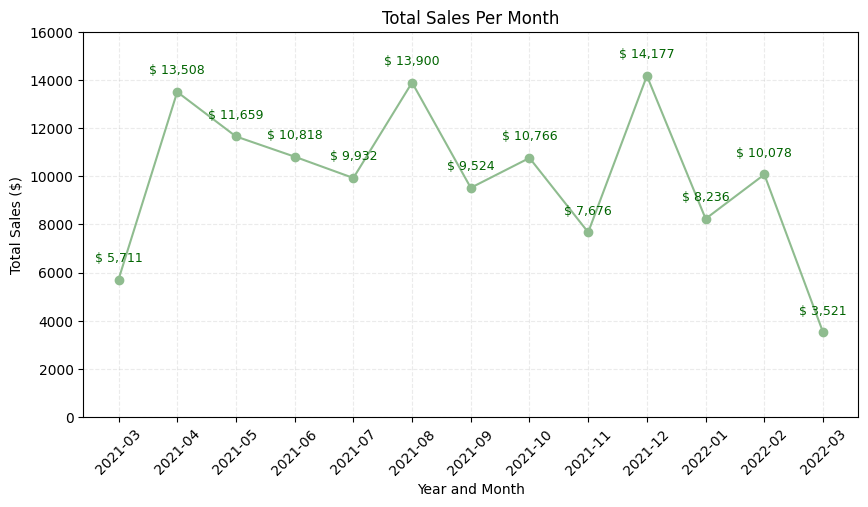

In [246]:
"""Voy a representar las transacciones aceptadas"""

# Solo transacciones aceptadas y hacer una copia explícita para evitar el warning
accepted_transactions = dict_transactions['transactions'].loc[dict_transactions['transactions']['declined'] == 0].copy()
accepted_transactions = dict_transactions['transactions'].query("declined == 0").copy()

# Creo columna year_month
accepted_transactions['year_month'] = accepted_transactions['timestamp'].dt.to_period('M')

# Agrupar por mes y sumar las cantidades
monthly_total_accepted_transactions = round(accepted_transactions.groupby(["year_month"], as_index=False)["amount"].sum(), 2)

x = monthly_total_accepted_transactions["year_month"].astype(str)           # Necesito convertirlo a string para representarlo
y = monthly_total_accepted_transactions["amount"]

# Gráfico
plt.figure(figsize=(10, 5))
plt.plot(x, y, color="darkseagreen",  marker='o' )
plt.title("Total Sales Per Month")
plt.xlabel("Year and Month")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.ylim(0, 16000)
plt.grid(True, linestyle='--', alpha=0.25)

# Etiquetas de valores
for i, v in enumerate(y):
    plt.text(x[i], v + 750, f"$ {v:,.0f}", ha='center', fontsize=9, color='darkgreen')

# Mostrar
plt.show()

---

#### **Ejercicio 5**

Dues variables categòriques.

*Representación de las transacciones aceptadas y rechazadas.*

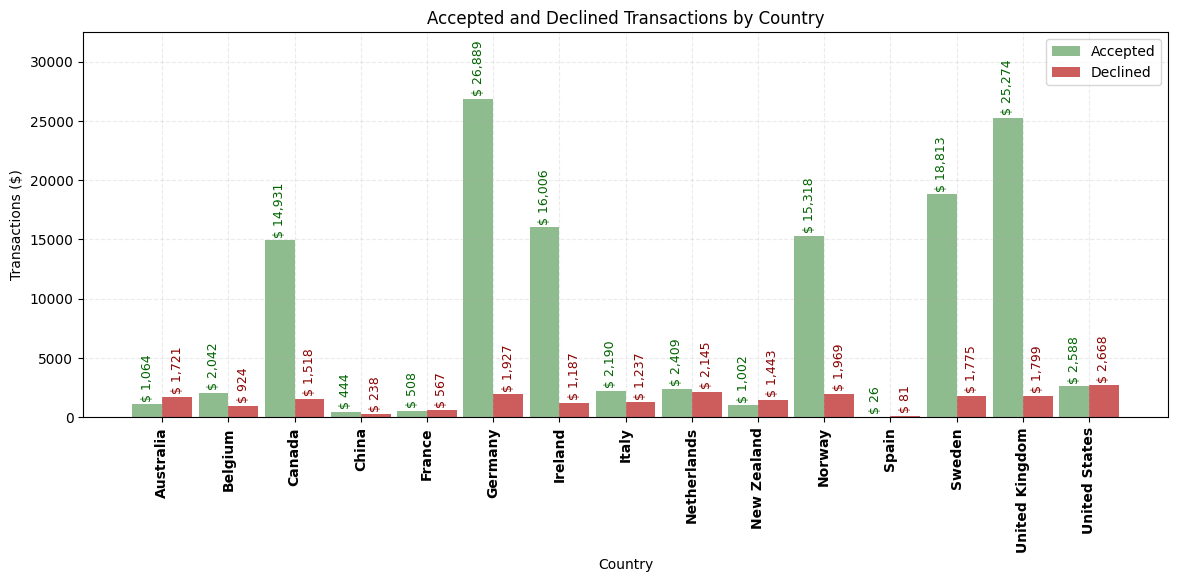

In [247]:
# Unir las transacciones aceptadas y rechazadas por país
transactions_with_companies = dict_transactions['transactions'].merge(dict_transactions['companies'][['company_id', 'country']], on='company_id', how='left')

# Agrupar por país y calcular las transacciones aceptadas y rechazadas
accepted_transactions_by_country = transactions_with_companies[transactions_with_companies['declined'] == 0].groupby('country')['amount'].sum()
declined_transactions_by_country = transactions_with_companies[transactions_with_companies['declined'] == 1].groupby('country')['amount'].sum()

# Crear un DataFrame con las transacciones aceptadas y rechazadas por país
transactions_by_country = pd.DataFrame({
	'amount_accepted': accepted_transactions_by_country,
	'amount_declined': declined_transactions_by_country})

# Crear eje X
x_labels = transactions_by_country.index
x = np.arange(len(x_labels))  # Posiciones en el eje X

# Configurar tamaño de figura
plt.figure(figsize=(14, 5))

# Crear barras con desplazamiento
bar_width = 0.45  # Espaciado entre barras
plt.bar(x - bar_width/2, transactions_by_country['amount_accepted'], width=bar_width, color='darkseagreen', label='Accepted')
plt.bar(x + bar_width/2, transactions_by_country['amount_declined'], width=bar_width, color='indianred', label='Declined')

# Ajustar etiquetas del eje X
plt.xticks(ticks=x, labels=x_labels, rotation=90, ha='center', fontweight='bold')

# Agregar etiquetas y título
plt.xlabel("Country")
plt.ylabel("Transactions ($)")
plt.title("Accepted and Declined Transactions by Country")
plt.ylim(0, 32500)
plt.grid(True, linestyle='--', alpha=0.25)
plt.legend()

# Agregar etiquetas de valores en las barras. Tengo que hacerlo para cada serie
for i, v in enumerate(transactions_by_country['amount_accepted']):
    plt.text(x[i] - bar_width/2, v + 500, f"$ {v:,.0f}", ha='center', fontsize=9, color='darkgreen', rotation=90)

for i, v in enumerate(transactions_by_country['amount_declined']):
    plt.text(x[i] + bar_width/2, v + 500, f"$ {v:,.0f}", ha='center', fontsize=9, color='darkred', rotation=90)

# Mostrar gráfico
plt.show()

*Representación de ventas por país y ciudad*

In [248]:
import plotly.express as px

# Unir transactions con data_users para obtener país y ciudad del comprador
transactions_with_users = dict_transactions['transactions'].merge(dict_transactions['data_users'][['user_id', 'country', 'city']], on='user_id', how='left')

# Agrupar por país y ciudad sumando el monto de compras
grouped_data = transactions_with_users.groupby(['country', 'city'], as_index=False)['amount'].sum()

# Crear el gráfico Treemap
fig = px.treemap(
    grouped_data, 
    path=['country', 'city'],  # Jerarquía de datos
    values='amount',  # Tamaño basado en el valor de compras
    color='amount',  # Colorear por valor de compras
    hover_data=['amount'],  # Mostrar información adicional al pasar el cursor
    color_continuous_scale='Viridis'  # Esquema de colores
)

# Mostrar
fig.show()

In [249]:
fig = px.sunburst(
    grouped_data, 
    path=['country', 'city'],  
    values='amount',  
    color='amount',  
    hover_data='amount',  
    color_continuous_scale='Blues',
    width= 600,
    height= 600
)

fig.show()


"""hover_data (str, or list of str or int, or Series or array-like, or dict) – Either a name or list of names of columns in data_frame,
or pandas Series, or array_like objects or a dict with column names as keys, with values True (for default formatting) False (in order
to remove this column from hover information), or a formatting string, for example ‘:.3f’ or ‘|%a’ or list-like data to appear in the
hover tooltip or tuples with a bool or formatting string as first element, and list-like data to appear in hover as second element Values
from these columns appear as extra data in the hover tooltip."""

'hover_data (str, or list of str or int, or Series or array-like, or dict) – Either a name or list of names of columns in data_frame,\nor pandas Series, or array_like objects or a dict with column names as keys, with values True (for default formatting) False (in order\nto remove this column from hover information), or a formatting string, for example ‘:.3f’ or ‘|%a’ or list-like data to appear in the\nhover tooltip or tuples with a bool or formatting string as first element, and list-like data to appear in hover as second element Values\nfrom these columns appear as extra data in the hover tooltip.'

---

#### **Ejercicio 6**

Tres variables.

*Representación gráfica de país, año y valor de las ventas.*

In [250]:
"""país, año y ventas"""

# Unir transactions con data_users para obtener el país del vendedor
transactions_with_companies = dict_transactions['transactions'].merge(dict_transactions['companies'][['company_id', 'country']], on='company_id', how='left')

# Agrupo por país, año y calculo la suma de las transacciones aceptadas
country_year_sum_accepted_transactions = transactions_with_companies.groupby(['country', 'year_month'], as_index=False)['amount'].sum()
country_year_sum_accepted_transactions = country_year_sum_accepted_transactions.groupby(["country","year_month"])[["amount"]].sum().reset_index()

map = px.scatter_geo(country_year_sum_accepted_transactions,
                    locations= 'country', 
                    size='amount',
                    locationmode =  "country names",
                    size_max=60,
                    animation_frame='year_month',
                    projection="equirectangular",
                    hover_name='country', 
                    hover_data={'amount':':,.2f'},
                    width= 900,
                    height= 600)

map.show()

---

#### **Ejercicio 7**

Graficar un Pairplot.

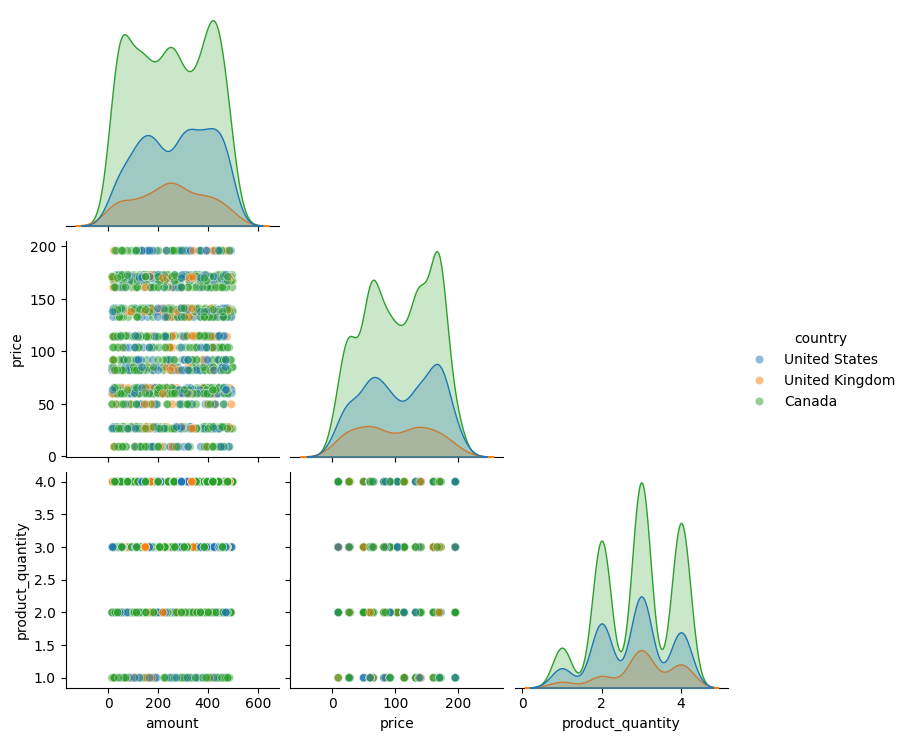

In [251]:
# Merge transactions, trans_prod, products, data_users
merged_data = dict_transactions['transactions'].merge(dict_transactions['trans_prod'], on="transaction_id", how="inner").merge(dict_transactions['products'][['product_id', 'price']], on="product_id", how="inner").merge(dict_transactions['data_users'], on="user_id", how="inner")

# Seleccionar variables numéricas y la columna 'country'
pairplot_data = merged_data[['amount', 'price', 'year_month', 'country', 'product_quantity']]

# Pairplot
sns.pairplot(pairplot_data, kind="scatter", diag_kind="kde", corner=True, plot_kws={'alpha':0.5}, hue="country")
plt.show()


***
***

### **Nivel 2**

#### **Ejercicio 1**

Correlació de totes les variables numèriques.

                    amount  declined   user_id       lat  longitude      year  \
amount            1.000000 -0.037882 -0.035354  0.078116   0.043439 -0.088487   
declined         -0.037882  1.000000  0.414293  0.010402  -0.002523 -0.037207   
user_id          -0.035354  0.414293  1.000000 -0.004486   0.017145  0.027736   
lat               0.078116  0.010402 -0.004486  1.000000  -0.006894 -0.024211   
longitude         0.043439 -0.002523  0.017145 -0.006894   1.000000 -0.048819   
year             -0.088487 -0.037207  0.027736 -0.024211  -0.048819  1.000000   
month             0.054914 -0.038702 -0.091357  0.013557   0.021973 -0.655303   
day               0.051248  0.011546 -0.030009  0.025323  -0.009681 -0.129569   
product_quantity  0.007070  0.024589  0.037925  0.002279  -0.021693  0.035372   

                     month       day  product_quantity  
amount            0.054914  0.051248          0.007070  
declined         -0.038702  0.011546          0.024589  
user_id          -

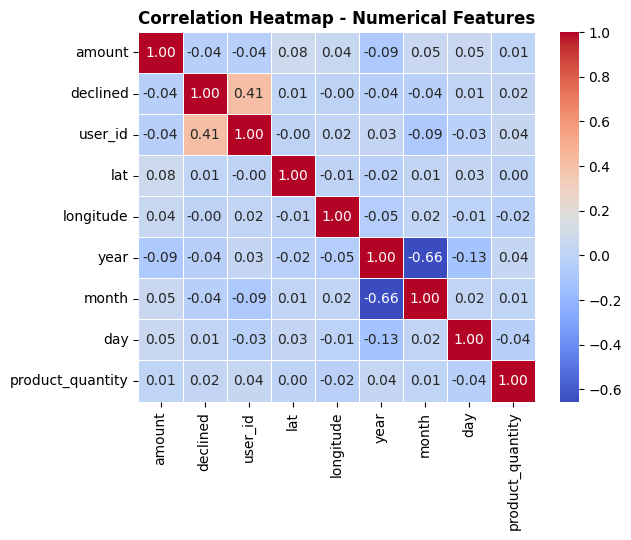

In [253]:
"""MERGE ALL"""
numerical_cols = dict_transactions['transactions'].select_dtypes(include=['float64', 'int64'])

correlation = numerical_cols.corr()
print(correlation)

sns.heatmap(correlation, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap - Numerical Features", fontweight="bold")

plt.show()

---

#### **Ejercicio 2**

Implementa un jointplot.

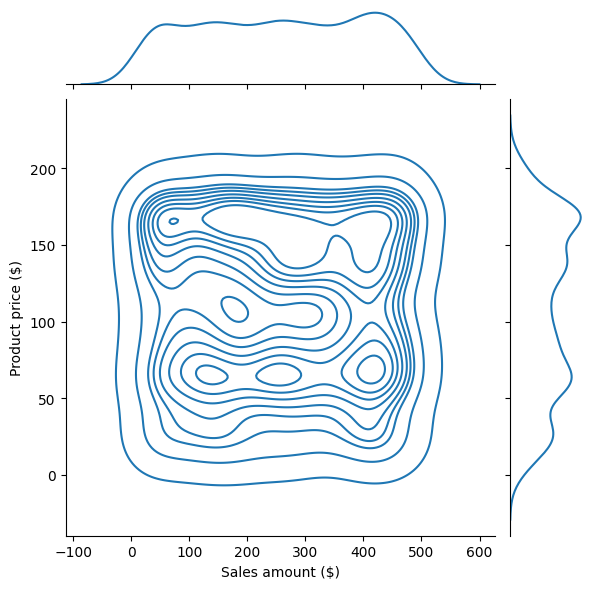

In [254]:
# Unir transacciones con productos
merged_data = dict_transactions['transactions'].merge(dict_transactions['trans_prod'], on="transaction_id", how="inner").merge(dict_transactions['products'][['product_id', 'price']], on="product_id", how="inner")
total_transaction_amount = merged_data.groupby(by=['transaction_id'])['amount'].sum()/merged_data['transaction_id'].value_counts()
product_price = merged_data.groupby('product_id')['price'].mean()
#print(total_transaction_amount)
#print(product_price)

# Tengo que relacionar cada id con su valor total:
merged_data['total_transaction_amount'] = merged_data['transaction_id'].map(total_transaction_amount)
merged_data['product_price'] = merged_data['product_id'].map(product_price)

sns.jointplot(data=merged_data, x='total_transaction_amount', y='product_price', kind='kde')
plt.xlabel("Sales amount ($)")
plt.ylabel("Product price ($)")
plt.show()


---
---

### **Nivel 3**

#### **Ejercicio 1**

Implementa un violinplot combinat amb un altre tipus de gràfic.

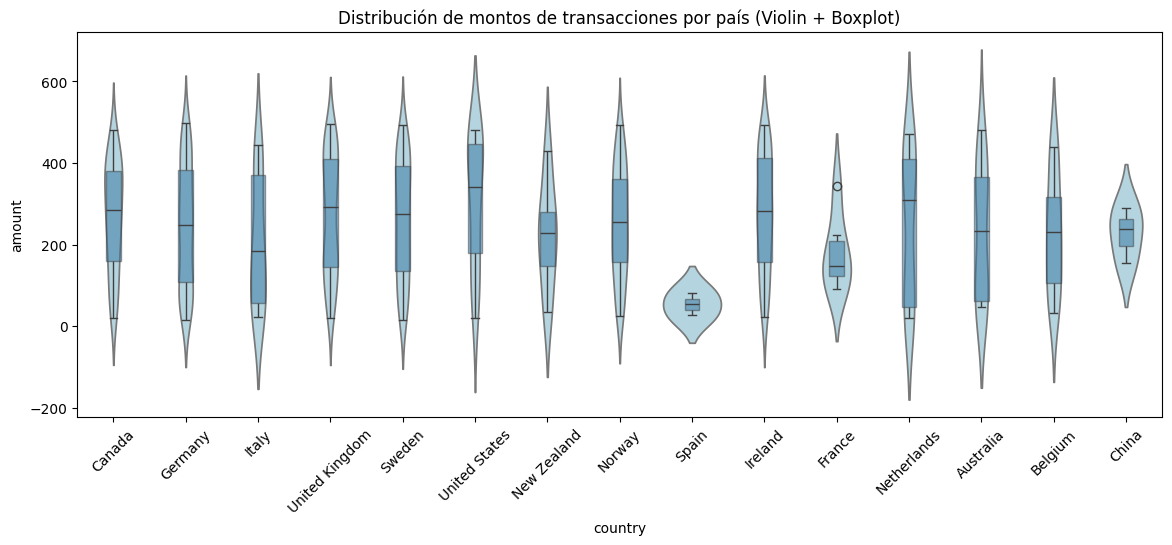

In [255]:
plt.figure(figsize=(14, 5))
sns.violinplot(x='country', y='amount', data=transactions_with_companies, inner=None, color="lightblue")
sns.boxplot(x='country', y='amount', data=transactions_with_companies, width=0.2, boxprops=dict(alpha=0.5))
plt.xticks(rotation=45)
plt.title("Distribución de montos de transacciones por país (Violin + Boxplot)")
plt.show()


# Ver otras opciones

---

#### **Ejercicio 2**

Genera un FacetGrid per a visualitzar múltiples aspectes de les dades simultàniament.

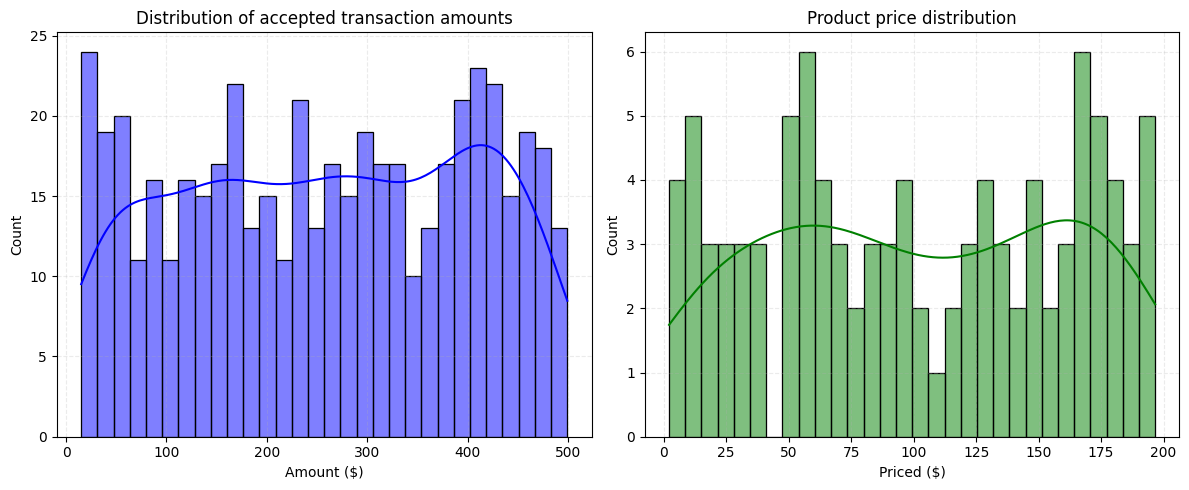

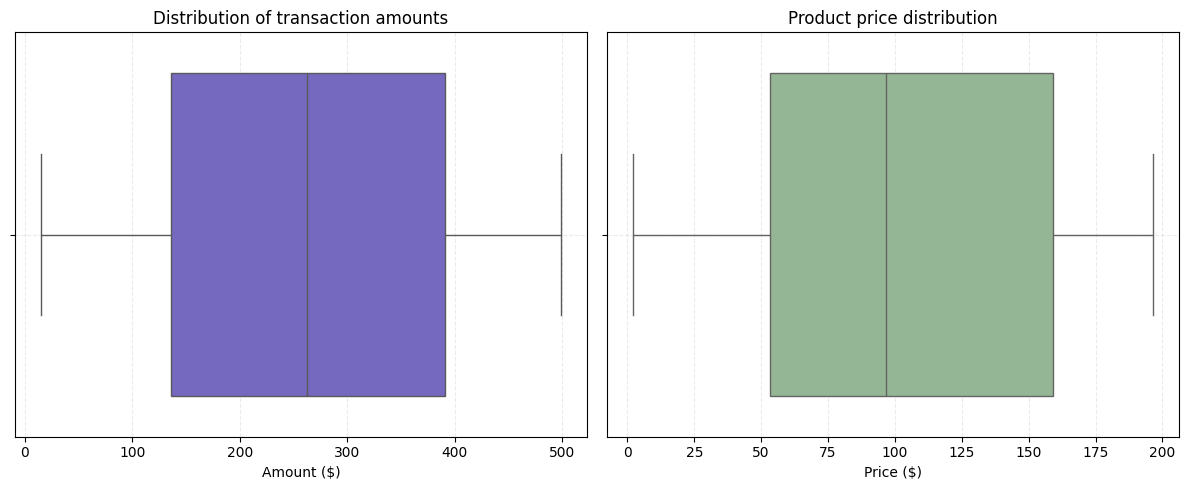

In [256]:
import seaborn as sns

plt.figure(figsize=(12, 5))

# Histograma de amount
plt.subplot(1, 2, 1)        # Dos gráficos al mismo nivel (uno al lado del otro), el de la izquierda
sns.histplot(accepted_transactions['amount'], bins=30, kde=True, color="blue")
plt.title("Distribution of accepted transaction amounts")
plt.xlabel("Amount ($)")
plt.ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.25)

# Histograma de price
plt.subplot(1, 2, 2)        # Dos gráficos al mismo nivel (uno al lado del otro), el de la derecha
sns.histplot(dict_transactions['products']['price'], bins=30, kde=True, color="green")
plt.title("Product price distribution")
plt.xlabel("Priced ($)")
plt.ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.25)

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))

# Boxplot de amount
plt.subplot(1, 2, 1)
sns.boxplot(x=accepted_transactions['amount'], color="slateblue")
plt.title("Distribution of transaction amounts")
plt.xlabel("Amount ($)")
plt.grid(True, linestyle='--', alpha=0.25)

# Boxplot de price
plt.subplot(1, 2, 2)
sns.boxplot(x=dict_transactions['products']['price'], color="darkseagreen")
plt.title("Product price distribution")
plt.xlabel("Price ($)")
plt.grid(True, linestyle='--', alpha=0.25)

plt.tight_layout()
plt.show()
